# This is the file used to perform preliminary analysis on the data

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [11]:
# Load the master_df
master_df = pd.read_csv("master_df.csv")
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5219 non-null   object 
 1   ('Close', 'IWM')   5219 non-null   float64
 2   ('Close', 'QQQ')   5219 non-null   float64
 3   ('Close', 'SPY')   5219 non-null   float64
 4   ('High', 'IWM')    5219 non-null   float64
 5   ('High', 'QQQ')    5219 non-null   float64
 6   ('High', 'SPY')    5219 non-null   float64
 7   ('Low', 'IWM')     5219 non-null   float64
 8   ('Low', 'QQQ')     5219 non-null   float64
 9   ('Low', 'SPY')     5219 non-null   float64
 10  ('Open', 'IWM')    5219 non-null   float64
 11  ('Open', 'QQQ')    5219 non-null   float64
 12  ('Open', 'SPY')    5219 non-null   float64
 13  ('Volume', 'IWM')  5219 non-null   float64
 14  ('Volume', 'QQQ')  5219 non-null   float64
 15  ('Volume', 'SPY')  5219 non-null   float64
 16  VIX                5219 

In [3]:
# Compute correlation matrix
numeric_df = master_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

print(corr_matrix.round(3))

                   ('Close', 'IWM')  ('Close', 'QQQ')  ('Close', 'SPY')  \
('Close', 'IWM')              1.000             0.946             0.962   
('Close', 'QQQ')              0.946             1.000             0.996   
('Close', 'SPY')              0.962             0.996             1.000   
('High', 'IWM')               1.000             0.946             0.963   
('High', 'QQQ')               0.946             1.000             0.995   
('High', 'SPY')               0.962             0.995             1.000   
('Low', 'IWM')                1.000             0.945             0.962   
('Low', 'QQQ')                0.946             1.000             0.995   
('Low', 'SPY')                0.963             0.995             1.000   
('Open', 'IWM')               1.000             0.945             0.962   
('Open', 'QQQ')               0.946             1.000             0.995   
('Open', 'SPY')               0.962             0.995             1.000   
('Volume', 'IWM')        

In [5]:
# Sort correlation pairs
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
# Drop self-correlations (=1.0)
corr_pairs = corr_pairs[corr_pairs < 1.0]
print(corr_pairs.head(20))

('High', 'SPY')   ('Open', 'SPY')     0.999942
('Open', 'SPY')   ('High', 'SPY')     0.999942
('Open', 'QQQ')   ('High', 'QQQ')     0.999940
('High', 'QQQ')   ('Open', 'QQQ')     0.999940
('Low', 'QQQ')    ('Close', 'QQQ')    0.999938
('Close', 'QQQ')  ('Low', 'QQQ')      0.999938
('Open', 'SPY')   ('Low', 'SPY')      0.999936
('Low', 'SPY')    ('Open', 'SPY')     0.999936
('Close', 'SPY')  ('Low', 'SPY')      0.999935
('Low', 'SPY')    ('Close', 'SPY')    0.999935
('High', 'SPY')   ('Close', 'SPY')    0.999934
('Close', 'SPY')  ('High', 'SPY')     0.999934
('Low', 'QQQ')    ('Open', 'QQQ')     0.999932
('Open', 'QQQ')   ('Low', 'QQQ')      0.999932
('Close', 'QQQ')  ('High', 'QQQ')     0.999932
('High', 'QQQ')   ('Close', 'QQQ')    0.999932
                  ('Low', 'QQQ')      0.999901
('Low', 'QQQ')    ('High', 'QQQ')     0.999901
('High', 'SPY')   ('Low', 'SPY')      0.999890
('Low', 'SPY')    ('High', 'SPY')     0.999890
dtype: float64


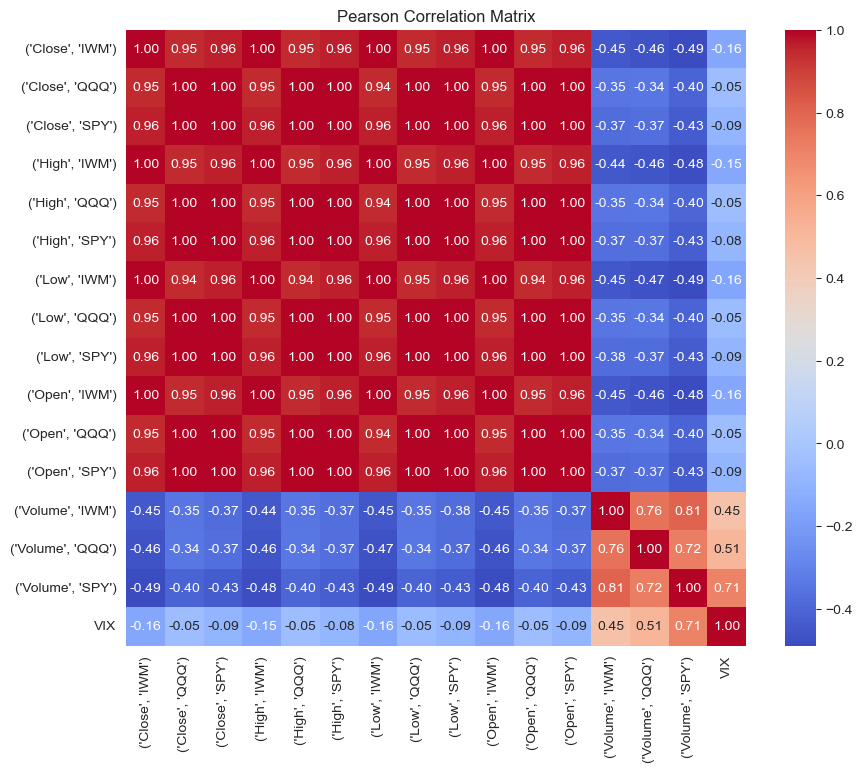

In [6]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))

# Set the color map to coolwarm
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix")

# Save the heatmap
plt.savefig("pearson_correlation_matrix_heatmap.png")
plt.show()

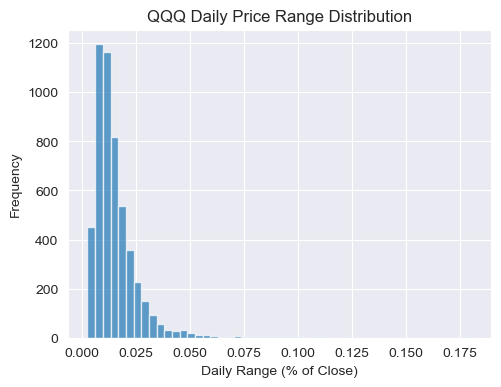

In [14]:
# Compute Range and Range_Pct using string column names
master_df["('Range', 'QQQ')"] = master_df["('High', 'QQQ')"] - master_df["('Low', 'QQQ')"]
master_df["('Range_Pct', 'QQQ')"] = master_df["('Range', 'QQQ')"] / master_df["('Close', 'QQQ')"]

# Plot histogram of the QQQ daily range as a percentage of Close
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(master_df["('Range_Pct', 'QQQ')"], bins=50, alpha=0.7)
plt.xlabel('Daily Range (% of Close)')
plt.ylabel('Frequency')
plt.title('QQQ Daily Price Range Distribution')
plt.show()

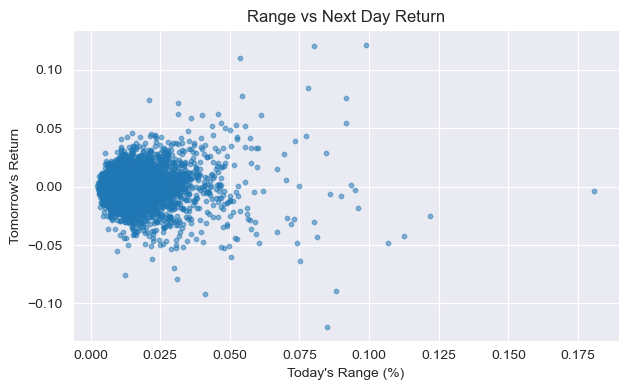

In [15]:
# Compute tomorrow's return using string column name
master_df["Tomorrow_Return"] = master_df["('Close', 'QQQ')"].pct_change().shift(-1)

# Scatter plot: today's range vs tomorrow's return
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.scatter(
    master_df["('Range_Pct', 'QQQ')"],
    master_df["Tomorrow_Return"],
    alpha=0.5, s=10
)
plt.xlabel("Today's Range (%)")
plt.ylabel("Tomorrow's Return")
plt.title("Range vs Next Day Return")
plt.tight_layout()
plt.show()

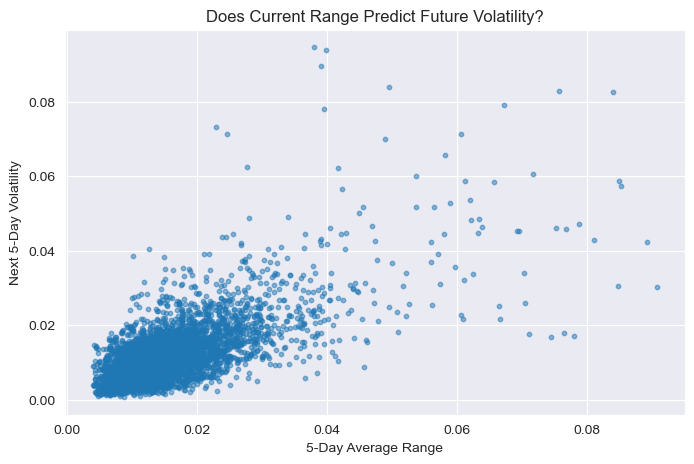

In [18]:
# Analyze if high ranges predict future volatility

# Compute 5-day moving average of QQQ's daily range percentage
master_df["Range_MA"] = master_df["('Range_Pct', 'QQQ')"].rolling(window=5).mean()

# Compute 5-day future volatility (std of returns)
master_df["Future_Volatility"] = (
    master_df["('Close', 'QQQ')"]
    .pct_change()
    .rolling(window=5)
    .std()
    .shift(-5)
)

# Scatter plot: average range vs future volatility
plt.figure(figsize=(8, 5))
plt.scatter(master_df["Range_MA"], master_df["Future_Volatility"], alpha=0.5, s=10)
plt.xlabel("5-Day Average Range")
plt.ylabel("Next 5-Day Volatility")
plt.title("Does Current Range Predict Future Volatility?")
plt.show()